# 1. Probabilidad Laplaciana (clásica)
Para un experimento aleatorio, se tiene que $\Omega$ es el espacio muestral.

Sea $A$ un evento, entonces

$$ \mathbb{P}(A) = \frac{\#A}{\#\Omega} $$

**EJEMPLO:** Sea el experimento de lanzar una moneda 3 veces, de manera independiente (es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento). El espacio muestral de este experimento es:

$$ \Omega = \{A,S\} \times \{A,S\} \times \{A,S\} = \{A,S\}^3 $$
y tenemos que $\#\Omega = 2^3$.

Sean los eventos:
* $A$: todos los resultados son águila
* $S$: todos los resultados son soles
* $E$: Por lo menos un resultado es sol
  
Calcular las probabilidades de estos eventos:

**Solución** Vamos a descomponer mi conjunto $A$ de la siguiente manera:
$$A = A_1 \cap A_2 \cap A_3 $$
donde $A_i$: caé águila en el $i$-ésimo resultado.

In [1]:
# Vamos a crear el espacio muestral
import itertools #importamos el modulo
from itertools import product

Omega = set( product({"A","S"},repeat=3 ))
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [2]:
len(Omega) # cardinalidad de Omega

8

In [3]:
# Vamos a crear el evento A_1
A_1 = { om for om in Omega if om[0]=="A"} # la primera coordenada es águila
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [4]:
# Vamos a crear el evento A_2
A_2 = { om for om in Omega if om[1]=="A"} # la segunda coordenada es águila
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [5]:
# Vamos a crear el evento A_3
A_3 = { om for om in Omega if om[2]=="A"} # la tercera coordenada es águila
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [6]:
# Vamos a crear el evento A
A = A_1.intersection(A_2.intersection(A_3))
A

{('A', 'A', 'A')}

In [7]:
len(A)

1

In [8]:
# Vamos a calcular la probabilidad de A
P_A = len(A) / len(Omega)
P_A

0.125

Yo quiero expresar mi resultado en fracción, esto se hace de la siguiente manera:

In [9]:
from fractions import Fraction

def p(E,Omega):
    p = Fraction(len(E),len(Omega))
    return p

In [10]:
prob = p(A,Omega)
prob

Fraction(1, 8)

# 2. Probabilidad condicional

Definimos la probabilidad de que ocurra un evento $A$ sabiendo que ocurre el evento $B$,
$$ \mathbb{P}(A \mid B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} = \frac{\# A\cap B}{\#B} $$
donde $\mathbb{P}(B)>0$.

In [32]:
def prob_cond(E,F):
    return len(E & F) / len(F)

Quiero calcular la probabilidad condicional de los siguientes eventos:
* El primer lanzamiento es águila
* Dos de los resultados son águila

In [33]:
# El primer lanzamiento es águila
B = { om for om in Omega if om[0]=="A"} # el primer lanzamiento es águila
B

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [34]:
C = { om for om in Omega if om.count("A")==2}
C

{('A', 'A', 'S'), ('A', 'S', 'A'), ('S', 'A', 'A')}

In [35]:
def prob(E):
    return len(E) / len(Omega)

In [36]:
prob(B)

0.5

In [37]:
prob(C)

0.375

In [38]:
prob_cond(B,C)

0.6666666666666666

## Independencia de eventos

Decimos que dos eventos $A$ y $B$ son independientes si
$$ \mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$$
o de manera equivalente
$$ \mathbb{P}(A | B ) = \mathbb{P}(A) $$

In [39]:
def indep(E,F):
    return prob(E & F) == prob(E)*prob(F)

In [40]:
indep(B,C)

False

Vamos a considerar el evento:
* $D$: en el segundo lanzamiento es sol

In [41]:
D = { om for om in Omega if om[1]=="S"}
D

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [42]:
prob(D)

0.5

In [43]:
prob_cond(B,D)

0.5

In [44]:
indep(B,D)

True

Quiero verificar si $B$, $C$ y $D$ son independientes:

In [45]:
indep(B,D)

True

In [46]:
indep(C,D)

False

In [47]:
indep(B,C)

False

Por lo tanto, los eventos no son independientes.

**EJEMPLO** Sea el experimento aleatorio de lanzar un dado dos veces. Sabemos que el espacio muestral es el siguiente:
$$ \Omega = \{ (i,j) | i,j \in \{1,2,3,4,5,6 \} \} = \{1,2,3,4,5,6 \} \times \{1,2,3,4,5,6 \} = \{1,2,3,4,5,6 \}^2$$
y además $\#\Omega = 6^2 = 36$

In [48]:
Omega_dado =  set( product([1,2,3,4,5,6],repeat=2 ))
Omega_dado

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [49]:
cardOm = len(Omega_dado)
cardOm

36

Definimos el evento:
* $S_n$: la suma de los dados en $n$
y escrito como conjunto es
$$ S_n = \{ (i,j)\in\Omega \mid i+j = n \}$$

In [50]:
def S(n):
    Sn = { (i,j) for i in range(1,7) for j in range(1,7) if i+j == n }
    return Sn

In [51]:
S_nueve = S(9)
S_nueve


{(3, 6), (4, 5), (5, 4), (6, 3)}

In [52]:
len(S_nueve) / cardOm

0.1111111111111111

$$ \mathbb{P}(S(9)) = 4/36 $$

# 3. El espacio muestral asociado a un experimento aleatorio

El espacio muestral $\Omega$ del experimento aleatorio de lanzar dos dados honestos, esta compuesto por todas las pearejas ordenadas $(i,j)$ tales que $1 \leq i,j \leq 6$

$$\Omega = \{ (i,j) \mid 1 \leq i,j \leq 6 \} $$
y sabemos que $\#\Omega = 6^2 = 36$

In [53]:
#usamos itertools
from itertools import product

In [54]:
Omega = set(product([1,2,3,4,5,6], repeat = 2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [55]:
card_Omega = len(Omega)
card_Omega

36

Sea $S_n$ el evento "La suma de los dados en $n$". Esto es:
$$S_n=\{(i,j)\in\Omega:i+j=n\}.$$

In [56]:
def S(n):
    Sn = {(i,j) for i in range(1,7) for j in range(1,7) if i+j==n}
    return Sn

In [57]:
print(S(9))

{(6, 3), (4, 5), (5, 4), (3, 6)}


In [58]:
print(S(12))

{(6, 6)}


# 4. La variable aleatoria asociada a $S_n$

In [59]:
# Definir la funcion P(A)
# Es la probabilidad del evento A definida mediante la definición clásica

def P(A):
    P = Fraction(len(A), len(Omega))
    return P

In [60]:
# Vamos a definir un diccionario S
# (i,j) pares ordenados y los valores de su suma

S = {(i,j) : i+j for i,j in Omega}

In [61]:
# Agrupación de combinaciones por suma

from collections import defaultdict

dS = defaultdict(set)

In [62]:
# Vamos a recorrer sobre los elementos en S

for i,j in S.items():

    dS[j].add(i)

In [63]:
list(dS.items())

[(7, {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)}),
 (4, {(1, 3), (2, 2), (3, 1)}),
 (9, {(3, 6), (4, 5), (5, 4), (6, 3)}),
 (10, {(4, 6), (5, 5), (6, 4)}),
 (6, {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)}),
 (8, {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)}),
 (11, {(5, 6), (6, 5)}),
 (3, {(1, 2), (2, 1)}),
 (5, {(1, 4), (2, 3), (3, 2), (4, 1)}),
 (2, {(1, 1)}),
 (12, {(6, 6)})]

In [64]:
# LeyS almacenar la probabilidad de casa posible suma,
# Usando la función P(A)
# En otras palabras "la función de densidad"
# A es el conjunto de pares que producden la suma i

leyS = {i : P(A) for i, A in dS.items() }
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

In [65]:
# Importamos la libreria Pandas

import pandas as pd

Recordemos que una variable aleatoria real $X$, es una función
$$X : \Omega \to \mathbb{R}$$

Sabemos que la función de densidad de una v.a. discreta $X$, se define como sigue:
$$ f_X(x) = \begin{cases} \mathbb{P}(X=x), \quad \text{si } x\in R_{X} \\ 0, \quad \text{e.o.c} \end{cases} $$
donde $R_X$ es el rango de la v.a. $X$.

Para nuestro evento $S_n$, se tiene la siguiente variable aleatoria
$$ S : \Omega \to \{2,3,4,5,6,7,8,9,10,11,12\}$$

In [66]:
# Vamos a crear una serie

ley_S = pd.Series(leyS)
ley_S.sort_index() #ordenar

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


In [67]:
import numpy as np # Importar la liberia

In [68]:
# LeyS(i) devuelve la probabilidad de obtener la suma i, si está en el rango de posibles sumas

def leyS(i):
    if i in range(2,13):
        x = ley_S[i]
    else:
        x = 0 # si no está en el rango me devuelve cero
    return x

In [69]:
# Vamos a crear el rango de S

#creo una lista con los posibles valores
rango_S = [k for k in range(2,13)]

#Obtenemos la probabilidad de cada suma
p_k = [float(leyS(k)) for k in rango_S]

In [70]:
# Creamos un DataFrame con:
# - los valores del rango_S
# - las probabilidades p_k
# Indexamos una etiqueta S_2,...,S_12

# zip() -> toma dos listas y las combina en pares ordenados
lS = pd.DataFrame(list(zip(rango_S, p_k)), index=[f"S_{i}" for i in range(2,13)], columns = ['rango','densidad'])
lS

,rango,densidad
S_2,2,0.027778
S_3,3,0.055556
S_4,4,0.083333
S_5,5,0.111111
S_6,6,0.138889
S_7,7,0.166667
S_8,8,0.138889
S_9,9,0.111111
S_10,10,0.083333
S_11,11,0.055556


<Axes: xlabel='rango'>

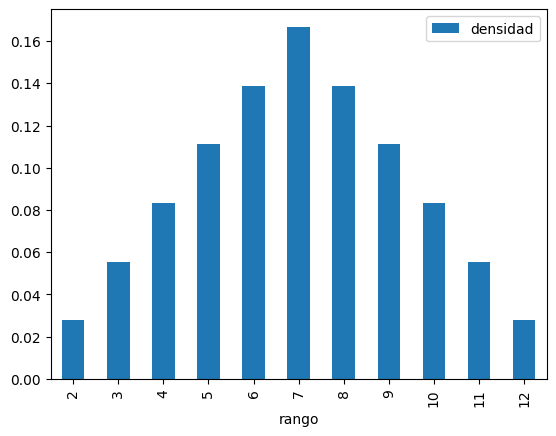

In [71]:
lS.plot.bar( x= 'rango', y = 'densidad')

# 5. Probabilidad Frecuentista

Tenemos la hipótesis de que el espacio muestral es un conjunto finito, y podemos definir la probabilidad asociada a un evento $A$:

$$ f_n(A) = \frac{n(A)}{n}, $$
donde $n(A)$ denota al número de veces que ocurre $A$, y $n$ es el número de veces en que se realiza el experimento.

In [80]:
import random

Se tiene el lanzamiento de monedas injustas (volados)


In [81]:
def volado(p):
    return 'sol' if random.random() < p else 'aguila'

In [82]:
volado(0.4)

'aguila'

In [83]:
a = [volado(0.4) for i in range(10)]
a

['aguila',
 'aguila',
 'sol',
 'aguila',
 'sol',
 'aguila',
 'aguila',
 'aguila',
 'sol',
 'sol']

In [84]:
a.count("sol")

4

In [85]:
resultados = [] # lista vacia

In [86]:
for i in range(10):
    resultado = volado(0.4)
    resultados.append(resultado)
resultados

['aguila',
 'sol',
 'aguila',
 'aguila',
 'aguila',
 'aguila',
 'aguila',
 'sol',
 'aguila',
 'aguila']

In [87]:
# Vamos a simular nuestra probabilidad frecuentista
p = [] #Lista para almacernar las probabilidades

for i in range(1000): #Simula 1000 experimentos
    N = 1000 # numero de lanzamientos
    resultados = []

    for i in range(N):
        resultado = volado(0.63)
        resultados.append(resultado)

    n_soles = resultados.count("sol") # cuenta en número de soles
    p_soles = n_soles / N #calcula la proporción

    p.append(p_soles)

# Probabilidad promedio
p_soles_prom = sum(p) / 1000

print("Probabiliad {:.3f}".format(p_soles_prom))

Probabiliad 0.630


# 6. Ejercicios del capítulo

**EJEMPLO:** Sea el experimento de lanzar una moneda 3 veces, de manera independiente (es decir, el $i$-ésimo lanzamiento no me afecta al $i+1$ lanzamiento). El espacio muestral de este experimento es:

$$ \Omega = \{A,S\} \times \{A,S\} \times \{A,S\} = \{A,S\}^3 $$

y tenemos que $\#\Omega = 2^3$.

Sean los eventos:
* $A$: todos los resultados son águila
* $S$: todos los resultados son soles
* $E$: por lo menos un resultado es sol

Calcular las probabilidades de estos eventos:

**Solución** Vamos a descomponer mi conjunto $A$ de la siguiente manera:
$$A = A_1 \cap A_2 \cap A_3 $$
donde $A_1$: caé águila en el $i$-ésimo resultado.

In [88]:
# Vamos a crear el espacio muestral
import itertools #importamos el modulo
from itertools import product

Omega = set(product({"A","S"},repeat = 3))
Omega

{('A', 'A', 'A'),
 ('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [89]:
len(Omega) #cardinalidad de Omega

8

In [90]:
# Vamos a crear el evento A_1
A_1 = {om for om in Omega if om[0] == "A"} # la primera coordenada es águila
A_1

{('A', 'A', 'A'), ('A', 'A', 'S'), ('A', 'S', 'A'), ('A', 'S', 'S')}

In [91]:
# Vamos a crear el evento A_2
A_2 = {om for om in Omega if om[1] == "A"} # la segunda coordenada es águila
A_2

{('A', 'A', 'A'), ('A', 'A', 'S'), ('S', 'A', 'A'), ('S', 'A', 'S')}

In [92]:
# Vamos a crear el evento A_3
A_3 = {om for om in Omega if om[2] == "A"} # la tercera coordenada es águila
A_3

{('A', 'A', 'A'), ('A', 'S', 'A'), ('S', 'A', 'A'), ('S', 'S', 'A')}

In [93]:
# Vamos a crear el evento A
A = A_1.intersection(A_2.intersection(A_3))
A

{('A', 'A', 'A')}

In [94]:
len(A)

1

In [95]:
# Vamos a calcular la probabilidad de A
P_A = len(A) / len(Omega)
P_A

0.125

Expresar resultado en fracción:

In [96]:
from fractions import Fraction

def p(E, Omega):
    p = Fraction(len(E), len(Omega))
    return p

In [97]:
prob = p(A, Omega)
prob

Fraction(1, 8)

Ahora calculemos el evento $S$: Todos los resultados son soles

In [98]:
# Vamos a crear el evento S_1
S_1 = {om for om in Omega if om[0] == "S"} # la primera coordenada es sol
S_1

{('S', 'A', 'A'), ('S', 'A', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [99]:
# Vamos a crear el evento S_2
S_2 = {om for om in Omega if om[1] == "S"} # la segunda coordenada es sol
S_2

{('A', 'S', 'A'), ('A', 'S', 'S'), ('S', 'S', 'A'), ('S', 'S', 'S')}

In [100]:
# Vamos a crear el evento S_3
S_3 = {om for om in Omega if om[2] == "S"} # la tercera coordenada es sol
S_3

{('A', 'A', 'S'), ('A', 'S', 'S'), ('S', 'A', 'S'), ('S', 'S', 'S')}

In [101]:
# Vamos a crear el evento S
S = S_1.intersection(S_2.intersection(S_3))
S

{('S', 'S', 'S')}

In [102]:
len(S)

1

In [103]:
# Vamos a calcular la probabilidad de S
P_S = len(S) / len(Omega)
P_S

0.125

Finalmente calculemos el evento $E$: Por lo menos un resultado es sol

In [104]:
E_1 = {om for om in Omega if om[0] == "S"} #La primer cooordenada es sol
E_2 = {om for om in Omega if om[1] == "S"} #La segunda cooordenada es sol
E_3 = {om for om in Omega if om[2] == "S"} #La tercera cooordenada es sol

E = E_1.union(E_2.union(E_3)) #Al menos un resultado es sol
E

{('A', 'A', 'S'),
 ('A', 'S', 'A'),
 ('A', 'S', 'S'),
 ('S', 'A', 'A'),
 ('S', 'A', 'S'),
 ('S', 'S', 'A'),
 ('S', 'S', 'S')}

In [105]:
len(E)

7

In [106]:
# Vamos a calcular la probabilidad de E
P_E = len(E) / len(Omega)
P_E

0.875